In [1]:
 # 1A: Simple Moving Average *(Long only)*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [4]:
end1 = datetime.date.today()
end1

datetime.date(2023, 12, 3)

In [6]:
start1 = end1 - pd.Timedelta(days=50)
start1

datetime.date(2023, 10, 14)

In [7]:
df = yf.download('^NSEI',start = start1,end = end1,interval='5m')

[*********************100%%**********************]  1 of 1 completed


In [26]:
df.to_csv("NSE_5min_interval.csv")

In [18]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2400 entries, 2023-10-16 09:15:00+05:30 to 2023-12-01 15:25:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2400 non-null   float64
 1   High       2400 non-null   float64
 2   Low        2400 non-null   float64
 3   Close      2400 non-null   float64
 4   Adj Close  2400 non-null   float64
 5   Volume     2400 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.8 KB


(2400, 6)

In [27]:
df = pd.read_csv("NSE_5min_interval.csv",index_col = 0,parse_dates= True)
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.0
mean,9085.736067,9098.020021,9073.091265,9085.473730,9085.473730,0.0
std,357.789148,354.455476,360.572586,357.666477,357.666477,0.0
min,8063.000000,8080.049805,8056.200195,8063.299805,8063.299805,0.0
25%,8948.562256,8963.362305,8931.800049,8948.312744,8948.312744,0.0
50%,9193.575195,9203.849609,9182.949707,9193.524902,9193.524902,0.0
75%,9319.400146,9326.799805,9310.637695,9318.425049,9318.425049,0.0
max,9881.750000,9889.049805,9874.750000,9881.400391,9881.400391,0.0


In [56]:
df1a = df.copy()

<Axes: xlabel='Datetime'>

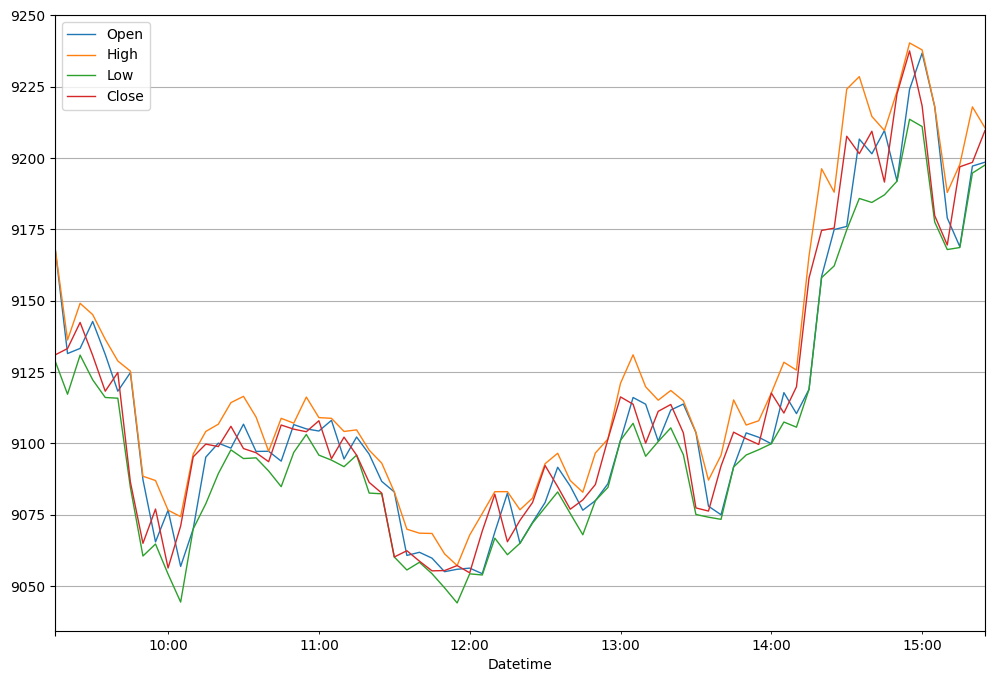

In [57]:
df1a.loc['12 May 2020',['Open','High','Low','Close']].plot(grid=True,linewidth = 1,figsize = (12,8))



In [59]:
#df1a.drop(columns = ['High','Low','Volume'],inplace=True)
df1a['cc_return'] = df1a['Close'].pct_change()
SMA = 12
df1a['sma']= df1a['Close'].rolling(window = SMA).mean()
df1a['position'] = np.where((df['Close']> df1a['sma']),1,0)
df1a['position'] = df1a['position'].shift(-1)
df1a.value_counts()


Open         High         Low          Close        Adj Close    Volume  cc_return  sma          position
8063.000000  8080.049805  8061.200195  8080.049805  8080.049805  0        0.002077  8083.458293  0.0         1
9287.000000  9313.200195  9286.849609  9299.349609  9299.349609  0        0.001276  9284.812500  1.0         1
9284.650391  9297.599609  9282.849609  9282.849609  9282.849609  0       -0.000188  9273.979085  1.0         1
9284.750000  9284.950195  9271.200195  9278.349609  9278.349609  0       -0.000657  9296.699870  0.0         1
9285.150391  9285.150391  9268.849609  9275.549805  9275.549805  0       -0.001055  9268.116536  1.0         1
                                                                                                            ..
9018.250000  9019.750000  9003.049805  9019.750000  9019.750000  0        0.000105  9018.516602  1.0         1
9018.000000  9018.000000  8979.849609  8991.099609  8991.099609  0       -0.002762  9022.370931  0.0         1
9017.9

In [60]:
df1a['strategy_returns'] = df1a['cc_return'] * df1a['position']
df1a['strategy_returns'] = 1+df1a['strategy_returns']
df1a['cc_return'] = 1+ df1a['cc_return']
print(df1a.head())
print(df1a.tail())

                                  Open         High          Low        Close  \
Datetime                                                                        
2020-03-26 09:15:00+05:30  8451.000000  8457.650391  8338.400391  8339.349609   
2020-03-26 09:20:00+05:30  8336.400391  8411.799805  8309.950195  8396.650391   
2020-03-26 09:25:00+05:30  8396.849609  8476.950195  8372.099609  8476.599609   
2020-03-26 09:30:00+05:30  8476.900391  8518.450195  8460.000000  8488.400391   
2020-03-26 09:35:00+05:30  8490.099609  8515.000000  8482.349609  8487.500000   

                             Adj Close  Volume  cc_return  sma  position  \
Datetime                                                                   
2020-03-26 09:15:00+05:30  8339.349609       0        NaN  NaN       0.0   
2020-03-26 09:20:00+05:30  8396.650391       0   1.006871  NaN       0.0   
2020-03-26 09:25:00+05:30  8476.599609       0   1.009522  NaN       0.0   
2020-03-26 09:30:00+05:30  8488.400391       0   1.0

Buy and Hold Returns:  0.0972
Strategy_returns nan


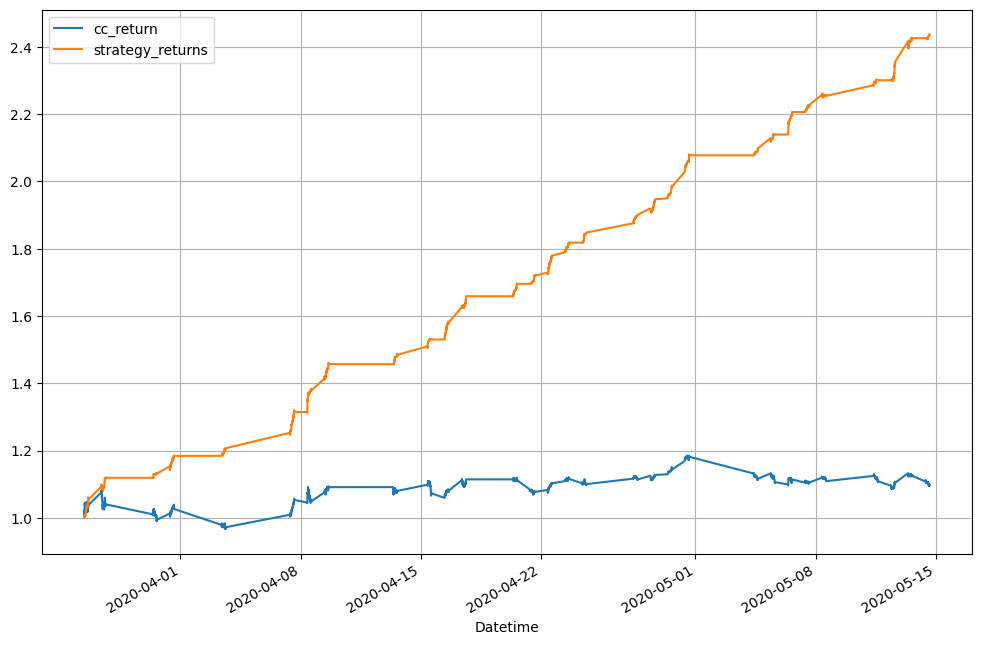

In [63]:
df1a[['cc_return','strategy_returns']].cumprod().plot(grid= True,figsize=(12,8))
print("Buy and Hold Returns: ",np.round(df1a['cc_return'].cumprod()[-1]-1,4))
print("Strategy_returns",np.round(df1a['strategy_returns'].cumprod()[-1]-2,4))

#### Strategy # 1B: Exponential Moving Average *(Long only)*

We compute the 12 period exponential moving average ('EMA12') and compare it with the price at that time. This is similar to the previous one, instead we use the EMA.

When we calculate the SMA for `n` periods, the same weight is applied to each of the past `n` prices. In EMA, on the other hand, we apply different weights to each past price. Higher weights are assigned to the more recent ones. All modern finance libraries directly calculate it for us. EMA reacts faster to price action than SMA.

In [67]:
df1b = df.copy()

Buy and Hold Returns:  0.0972
Strategy_returns nan


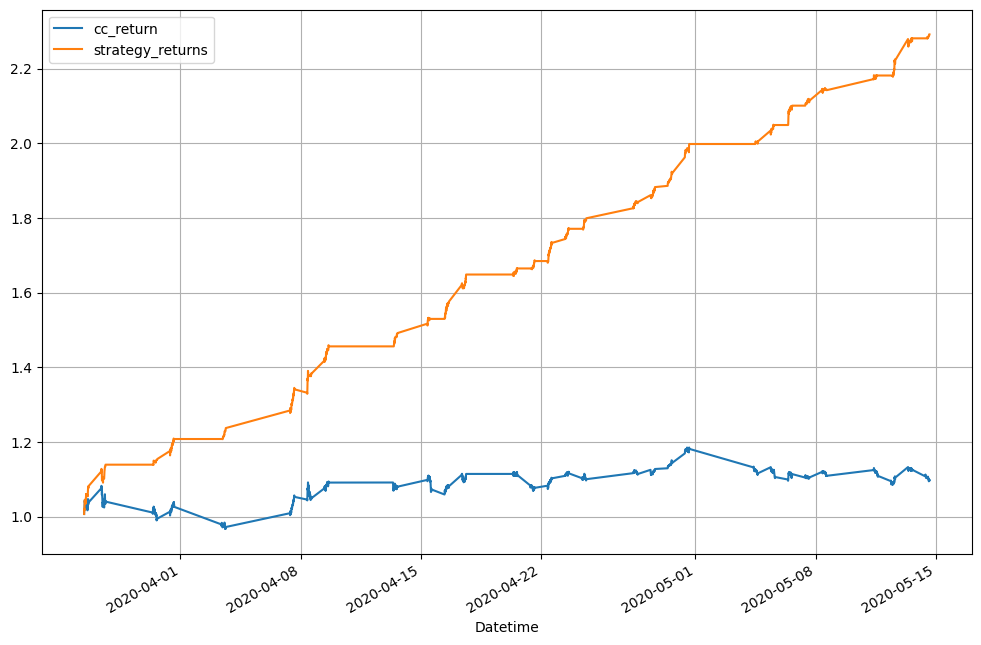

In [69]:

df1b['cc_return'] = df1b['Close'].pct_change()
EMA =12
df1b['ema'] = df1b['Close'].ewm(span = EMA,adjust=False).mean()
df1b['position'] = np.where((df1b['Close'] > df1b['ema']),1,0)
df1b['position'] = df1b['position'].shift(-2)
df1b['strategy_returns'] = df1b['cc_return'] * df1b['position']
df1b['strategy_returns'] = 1+df1b['strategy_returns']
df1b['cc_return'] = 1+ df1b['cc_return']
df1b[['cc_return','strategy_returns']].cumprod().plot(grid= True,figsize=(12,8))
print("Buy and Hold Returns: ",np.round(df1b['cc_return'].cumprod()[-1]-1,4))
print("Strategy_returns",np.round(df1b['strategy_returns'].cumprod()[-1]-2,4))
